In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import astroquery as aq
from astropy.io import fits
import exofop
from exofop.download import System, SystemDownloader
from exofop.extract import LightCurveTableList
from astropy.io import fits as pyfits
from astropy.modeling import models
import astropy.units as u
from specutils import Spectrum, SpectralRegion
import warnings
from specutils.spectra import Spectrum, SpectralRegion
from specutils.fitting import fit_generic_continuum
from specutils.spectra.spectrum import Spectrum
from specutils.fitting.continuum import fit_continuum

In [2]:
#Note, this takes a while to run. Keep that in mind
table = pd.read_excel(r'C:\Users\brajo\Downloads\exofop_tess_spectroscopy.xlsx')

In [37]:
#This number will go up as I download more and more
ticIDs = np.zeros(13)
prefix = "TIC_"
k = 0
for i in range(0, 1260):
    cell_value = table.at[i, "Instrument"]
    if cell_value == "TRES":  
        print(table.at[i, "SNR/resolution element"])
        if table.at[i, "SNR/resolution element"] > 70:
            if k > 0:
                if table.at[i, "TIC ID"] != table.at[i-1, "TIC ID"]:
                    ticIDs[k] = table.at[i, "TIC ID"]
                    k = k+1
           
            else:
                ticIDs[k] = table.at[i, "TIC ID"]
                k = k+1
#Need to turn it into an integer array first to get rid of .0's at the end, then into strings to I can add TIC_ to the start
ticIDs = ticIDs.astype(int)
ticIDs = ticIDs.astype(str)
ticIDs = np.char.add(prefix, ticIDs)
print(ticIDs)

['TIC_47667' 'TIC_716129' 'TIC_742255' 'TIC_742846' 'TIC_773008'
 'TIC_1640268' 'TIC_1732730' 'TIC_2507547' 'TIC_2622122' 'TIC_2625483'
 'TIC_2736798' 'TIC_4612575' 'TIC_6994727' 'TIC_8243025' 'TIC_9005699'
 'TIC_9216075' 'TIC_10988057' 'TIC_12654622' 'TIC_12858196' 'TIC_14203588'
 'TIC_14363474' 'TIC_14602163' 'TIC_16048383' 'TIC_16059316'
 'TIC_17232188']


In [44]:
#Current idea is to just use an if-then statement combined with a for-loop to go through the CSV, find the TOI, and download the data and do the
#same thing that I did this week. 
#This only needs to be run once *ever*, unless I specifically need to download new data, i.e., not after I just reset the kernal
#Copied from Documentation

# Specify the directory to store downloaded data
data_dir = "./tmp"
for i in range(0, 12):
    # Downloading Data
    #This is the only line that needs to change here I think?? Just need to update it based on what star I'm looking at
    system = System(ticIDs[i])
    system_loader = SystemDownloader(
        system=system,
        data_dir=data_dir,
    )

# Selecting tags and downloading them
#Idk why I have to use await, but code does not work properly otherwise. 
    tags = system_loader.spectroscopy.tags
    await system_loader.download(tags[:5], unzip=True)

# Extracting Light Curve Data
    target_dir = system_loader.target_dir
    lctl = LightCurveTableList.load_exofop_data(
        target_dir=target_dir,
    )
    lctl.standardise_column_names()
    lctl.apply_time_correction_in_case_of_discrepancy()

# Save the extracted data as a single ECSV file for future reference
    lctl.save()


INFO:httpx:HTTP Request: GET https://exofop.ipac.caltech.edu/tess/download_tag_files_zip.php?tag=439602 "HTTP/1.1 200 OK"


INFO:httpx:HTTP Request: GET https://exofop.ipac.caltech.edu/tess/download_tag_files_zip.php?tag=437927 "HTTP/1.1 200 OK"


INFO:exofop.download:file_name='439602.zip': OK
INFO:exofop.download:file_name='437927.zip': OK
INFO:httpx:HTTP Request: GET https://exofop.ipac.caltech.edu/tess/download_tag_files_zip.php?tag=437965 "HTTP/1.1 200 OK"


INFO:exofop.download:file_name='437965.zip': OK
INFO:httpx:HTTP Request: GET https://exofop.ipac.caltech.edu/tess/download_tag_files_zip.php?tag=439373 "HTTP/1.1 200 OK"


INFO:exofop.download:file_name='439373.zip': OK
INFO:httpx:HTTP Request: GET https://exofop.ipac.caltech.edu/tess/download_tag_files_zip.php?tag=439572 "HTTP/1.1 200 OK"


INFO:exofop.download:file_name='439572.zip': OK
INFO:exofop.download.downloaders:Downloaded 5 of 5 files (100.0 %) successfully.
INFO:exofop.download.downloaders:Successfully downloaded 5 files in 3.354956700000912 seconds.
ERROR:exofop.download.downloaders:An OSError occurred with error code 17: [WinError 183] Cannot create a file when that file already exists: './tmp\\TIC_47667\\zip\\temp_extract\\exofop_437927_tagid_job110192' -> './tmp\\TIC_47667\\437927'
ERROR:exofop.download.downloaders:An OSError occurred with error code 17: [WinError 183] Cannot create a file when that file already exists: './tmp\\TIC_47667\\zip\\temp_extract\\exofop_437965_tagid_job98410' -> './tmp\\TIC_47667\\437965'
ERROR:exofop.download.downloaders:An OSError occurred with error code 17: [WinError 183] Cannot create a file when that file already exists: './tmp\\TIC_47667\\zip\\temp_extract\\exofop_439373_tagid_job110192' -> './tmp\\TIC_47667\\439373'
ERROR:exofop.download.downloaders:An OSError occurred wit

INFO:httpx:HTTP Request: GET https://exofop.ipac.caltech.edu/tess/download_tag_files_zip.php?tag=148996 "HTTP/1.1 200 OK"


INFO:exofop.download:file_name='148996.zip': OK
INFO:exofop.download.downloaders:Downloaded 1 of 1 files (100.0 %) successfully.
INFO:exofop.download.downloaders:Successfully downloaded 1 files in 1.8327248999848962 seconds.
ERROR:exofop.download.downloaders:An OSError occurred with error code 17: [WinError 183] Cannot create a file when that file already exists: './tmp\\TIC_716129\\zip\\temp_extract\\exofop_148996_tagid_job111214' -> './tmp\\TIC_716129\\148996'
INFO:exofop.extract:Tags of datasets processed: 148996
ERROR:exofop.extract:No measurement file found in observation 148996


INFO:httpx:HTTP Request: GET https://exofop.ipac.caltech.edu/tess/download_tag_files_zip.php?tag=148985 "HTTP/1.1 200 OK"


INFO:exofop.download:file_name='148985.zip': OK
INFO:exofop.download.downloaders:Downloaded 1 of 1 files (100.0 %) successfully.
INFO:exofop.download.downloaders:Successfully downloaded 1 files in 1.4790500999661162 seconds.
ERROR:exofop.download.downloaders:An OSError occurred with error code 17: [WinError 183] Cannot create a file when that file already exists: './tmp\\TIC_742255\\zip\\temp_extract\\exofop_148985_tagid_job71681' -> './tmp\\TIC_742255\\148985'
INFO:exofop.extract:Tags of datasets processed: 148985
ERROR:exofop.extract:No measurement file found in observation 148985


INFO:httpx:HTTP Request: GET https://exofop.ipac.caltech.edu/tess/download_tag_files_zip.php?tag=149001 "HTTP/1.1 200 OK"


INFO:exofop.download:file_name='149001.zip': OK
INFO:exofop.download.downloaders:Downloaded 1 of 1 files (100.0 %) successfully.
INFO:exofop.download.downloaders:Successfully downloaded 1 files in 1.3784569000126794 seconds.
ERROR:exofop.download.downloaders:An OSError occurred with error code 17: [WinError 183] Cannot create a file when that file already exists: './tmp\\TIC_742846\\zip\\temp_extract\\exofop_149001_tagid_job98425' -> './tmp\\TIC_742846\\149001'
INFO:exofop.extract:Tags of datasets processed: 149001
ERROR:exofop.extract:No measurement file found in observation 149001


INFO:httpx:HTTP Request: GET https://exofop.ipac.caltech.edu/tess/download_tag_files_zip.php?tag=148998 "HTTP/1.1 200 OK"


INFO:exofop.download:file_name='148998.zip': OK
INFO:exofop.download.downloaders:Downloaded 1 of 1 files (100.0 %) successfully.
INFO:exofop.download.downloaders:Successfully downloaded 1 files in 1.320799200097099 seconds.
ERROR:exofop.download.downloaders:An OSError occurred with error code 17: [WinError 183] Cannot create a file when that file already exists: './tmp\\TIC_773008\\zip\\temp_extract\\exofop_148998_tagid_job98028' -> './tmp\\TIC_773008\\148998'
INFO:exofop.extract:Tags of datasets processed: 148998
ERROR:exofop.extract:No measurement file found in observation 148998


INFO:httpx:HTTP Request: GET https://exofop.ipac.caltech.edu/tess/download_tag_files_zip.php?tag=149008 "HTTP/1.1 200 OK"


INFO:exofop.download:file_name='149008.zip': OK
INFO:exofop.download.downloaders:Downloaded 1 of 1 files (100.0 %) successfully.
INFO:exofop.download.downloaders:Successfully downloaded 1 files in 1.463812500005588 seconds.
ERROR:exofop.download.downloaders:An OSError occurred with error code 17: [WinError 183] Cannot create a file when that file already exists: './tmp\\TIC_1640268\\zip\\temp_extract\\exofop_149008_tagid_job110192' -> './tmp\\TIC_1640268\\149008'
INFO:exofop.extract:Tags of datasets processed: 149008
ERROR:exofop.extract:No measurement file found in observation 149008


INFO:httpx:HTTP Request: GET https://exofop.ipac.caltech.edu/tess/download_tag_files_zip.php?tag=108626 "HTTP/1.1 200 OK"


INFO:httpx:HTTP Request: GET https://exofop.ipac.caltech.edu/tess/download_tag_files_zip.php?tag=113305 "HTTP/1.1 200 OK"


INFO:exofop.download:file_name='108626.zip': OK
INFO:exofop.download:file_name='113305.zip': OK
INFO:exofop.download.downloaders:Downloaded 2 of 2 files (100.0 %) successfully.
INFO:exofop.download.downloaders:Successfully downloaded 2 files in 1.429689300013706 seconds.
ERROR:exofop.download.downloaders:An OSError occurred with error code 17: [WinError 183] Cannot create a file when that file already exists: './tmp\\TIC_1732730\\zip\\temp_extract\\exofop_108626_tagid_job80663' -> './tmp\\TIC_1732730\\108626'
ERROR:exofop.download.downloaders:An OSError occurred with error code 17: [WinError 183] Cannot create a file when that file already exists: './tmp\\TIC_1732730\\zip\\temp_extract\\exofop_113305_tagid_job111214' -> './tmp\\TIC_1732730\\113305'
INFO:exofop.extract:Tags of datasets processed: 108626 113305
ERROR:exofop.extract:No measurement file found in observation 108626
ERROR:exofop.extract:No measurement file found in observation 113305


INFO:httpx:HTTP Request: GET https://exofop.ipac.caltech.edu/tess/download_tag_files_zip.php?tag=433904 "HTTP/1.1 200 OK"


INFO:httpx:HTTP Request: GET https://exofop.ipac.caltech.edu/tess/download_tag_files_zip.php?tag=433957 "HTTP/1.1 200 OK"


INFO:exofop.download:file_name='433904.zip': OK
INFO:exofop.download:file_name='433957.zip': OK
INFO:exofop.download.downloaders:Downloaded 2 of 2 files (100.0 %) successfully.
INFO:exofop.download.downloaders:Successfully downloaded 2 files in 1.3660737000172958 seconds.
ERROR:exofop.download.downloaders:An OSError occurred with error code 17: [WinError 183] Cannot create a file when that file already exists: './tmp\\TIC_2507547\\zip\\temp_extract\\exofop_433904_tagid_job110216' -> './tmp\\TIC_2507547\\433904'
ERROR:exofop.download.downloaders:An OSError occurred with error code 17: [WinError 183] Cannot create a file when that file already exists: './tmp\\TIC_2507547\\zip\\temp_extract\\exofop_433957_tagid_job98425' -> './tmp\\TIC_2507547\\433957'
INFO:exofop.extract:Tags of datasets processed: 433904 433957
ERROR:exofop.extract:No measurement file found in observation 433904
ERROR:exofop.extract:No measurement file found in observation 433957


INFO:httpx:HTTP Request: GET https://exofop.ipac.caltech.edu/tess/download_tag_files_zip.php?tag=148980 "HTTP/1.1 200 OK"


INFO:exofop.download:file_name='148980.zip': OK
INFO:exofop.download.downloaders:Downloaded 1 of 1 files (100.0 %) successfully.
INFO:exofop.download.downloaders:Successfully downloaded 1 files in 1.4745792000321671 seconds.
ERROR:exofop.download.downloaders:An OSError occurred with error code 17: [WinError 183] Cannot create a file when that file already exists: './tmp\\TIC_2622122\\zip\\temp_extract\\exofop_148980_tagid_job98028' -> './tmp\\TIC_2622122\\148980'
INFO:exofop.extract:Tags of datasets processed: 148980
ERROR:exofop.extract:No measurement file found in observation 148980


INFO:httpx:HTTP Request: GET https://exofop.ipac.caltech.edu/tess/download_tag_files_zip.php?tag=148979 "HTTP/1.1 200 OK"


INFO:exofop.download:file_name='148979.zip': OK
INFO:exofop.download.downloaders:Downloaded 1 of 1 files (100.0 %) successfully.
INFO:exofop.download.downloaders:Successfully downloaded 1 files in 1.4147854000329971 seconds.
ERROR:exofop.download.downloaders:An OSError occurred with error code 17: [WinError 183] Cannot create a file when that file already exists: './tmp\\TIC_2625483\\zip\\temp_extract\\exofop_148979_tagid_job110192' -> './tmp\\TIC_2625483\\148979'
INFO:exofop.extract:Tags of datasets processed: 148979
ERROR:exofop.extract:No measurement file found in observation 148979


INFO:httpx:HTTP Request: GET https://exofop.ipac.caltech.edu/tess/download_tag_files_zip.php?tag=148991 "HTTP/1.1 200 OK"


INFO:exofop.download:file_name='148991.zip': OK
INFO:exofop.download.downloaders:Downloaded 1 of 1 files (100.0 %) successfully.
INFO:exofop.download.downloaders:Successfully downloaded 1 files in 1.32633780001197 seconds.
ERROR:exofop.download.downloaders:An OSError occurred with error code 17: [WinError 183] Cannot create a file when that file already exists: './tmp\\TIC_2736798\\zip\\temp_extract\\exofop_148991_tagid_job111214' -> './tmp\\TIC_2736798\\148991'
INFO:exofop.extract:Tags of datasets processed: 148991
ERROR:exofop.extract:No measurement file found in observation 148991


INFO:httpx:HTTP Request: GET https://exofop.ipac.caltech.edu/tess/download_tag_files_zip.php?tag=241732 "HTTP/1.1 200 OK"


INFO:exofop.download:file_name='241732.zip': OK
INFO:exofop.download.downloaders:Downloaded 1 of 1 files (100.0 %) successfully.
INFO:exofop.download.downloaders:Successfully downloaded 1 files in 1.2814931999891996 seconds.
ERROR:exofop.download.downloaders:An OSError occurred with error code 17: [WinError 183] Cannot create a file when that file already exists: './tmp\\TIC_4612575\\zip\\temp_extract\\exofop_241732_tagid_job98425' -> './tmp\\TIC_4612575\\241732'
INFO:exofop.extract:Tags of datasets processed: 241732
ERROR:exofop.extract:No measurement file found in observation 241732


Dispersion is order-5 Legendre polynomial (NEEDS TEST)
Correcting for redshift: z=0.000000
Dispersion is order-5 Legendre polynomial (NEEDS TEST)
Correcting for redshift: z=0.000000
Dispersion is order-5 Legendre polynomial (NEEDS TEST)
Correcting for redshift: z=0.000000
Dispersion is order-5 Legendre polynomial (NEEDS TEST)
Correcting for redshift: z=0.000000
Dispersion is order-5 Legendre polynomial (NEEDS TEST)
Correcting for redshift: z=0.000000
Dispersion is order-5 Legendre polynomial (NEEDS TEST)
Correcting for redshift: z=0.000000
Dispersion is order-5 Legendre polynomial (NEEDS TEST)
Correcting for redshift: z=0.000000
Dispersion is order-5 Legendre polynomial (NEEDS TEST)
Correcting for redshift: z=0.000000
Dispersion is order-5 Legendre polynomial (NEEDS TEST)
Correcting for redshift: z=0.000000
Dispersion is order-5 Legendre polynomial (NEEDS TEST)
Correcting for redshift: z=0.000000
Dispersion is order-5 Legendre polynomial (NEEDS TEST)
Correcting for redshift: z=0.000000

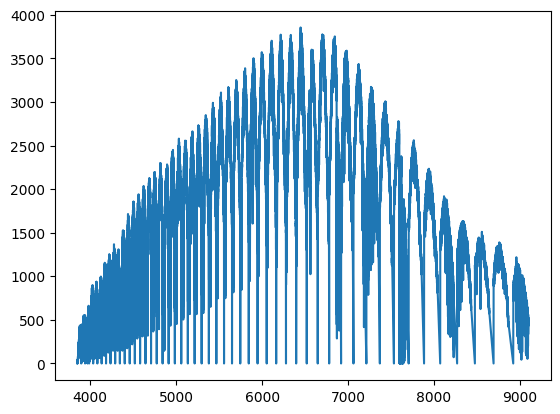

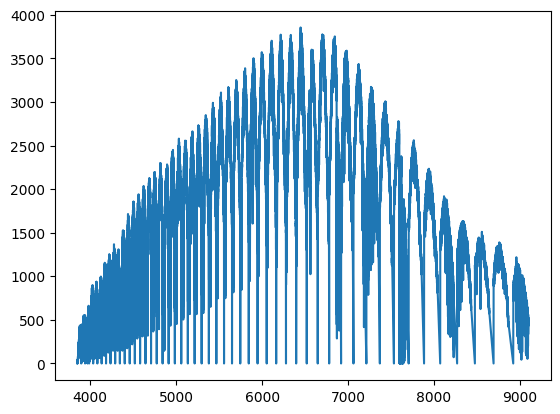

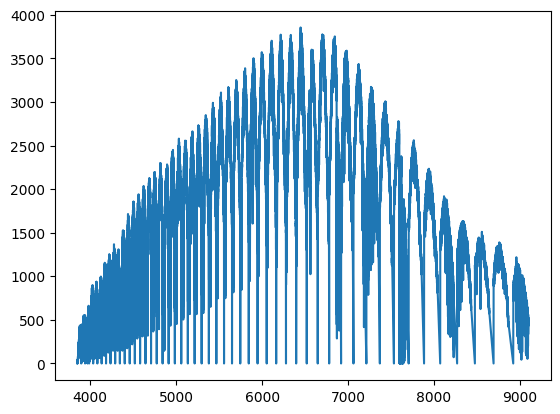

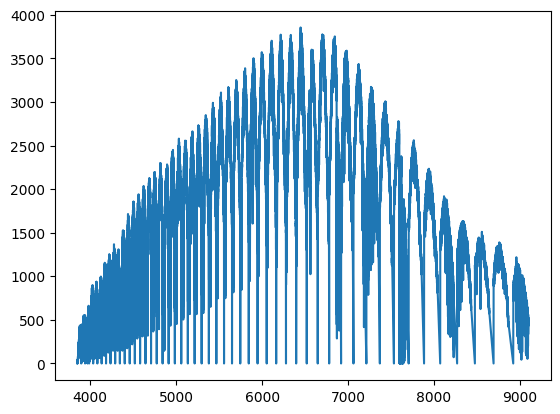

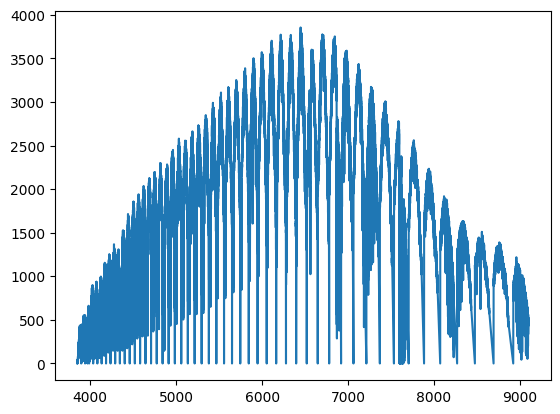

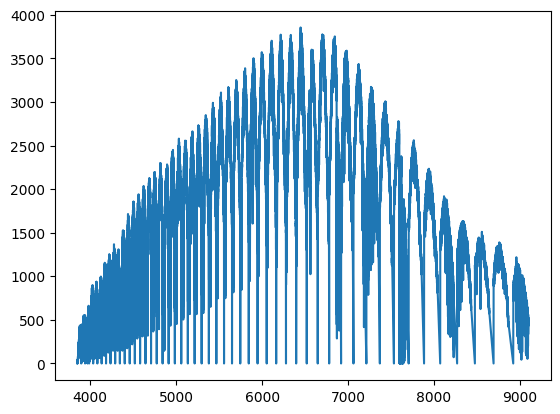

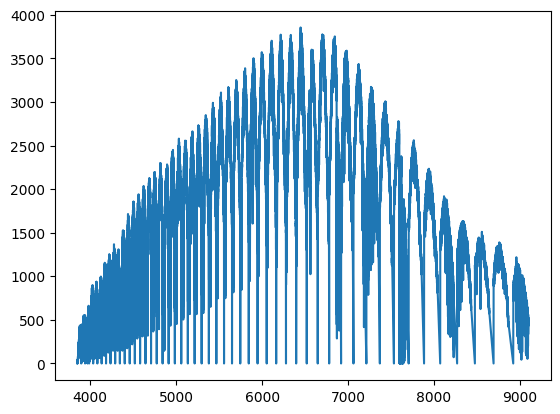

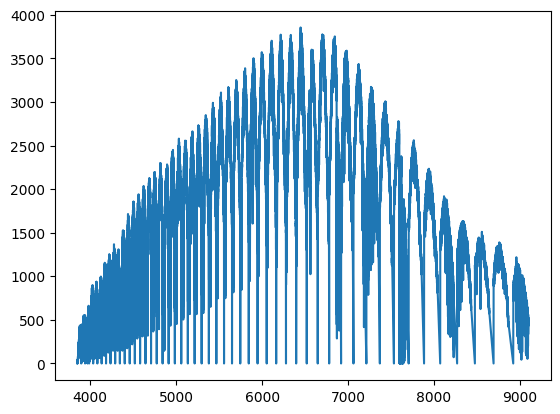

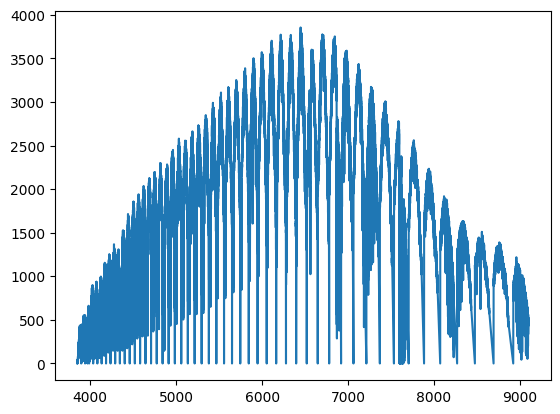

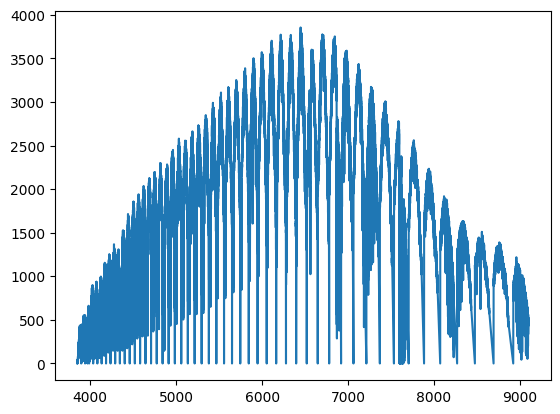

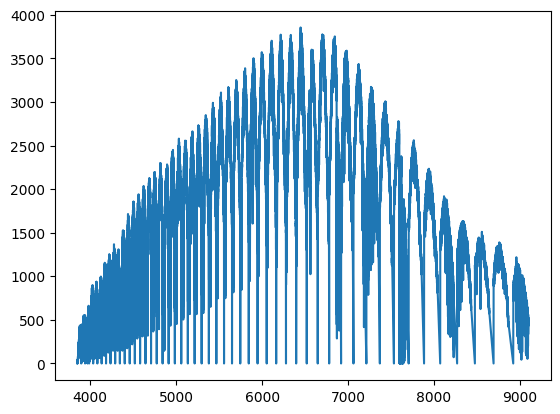

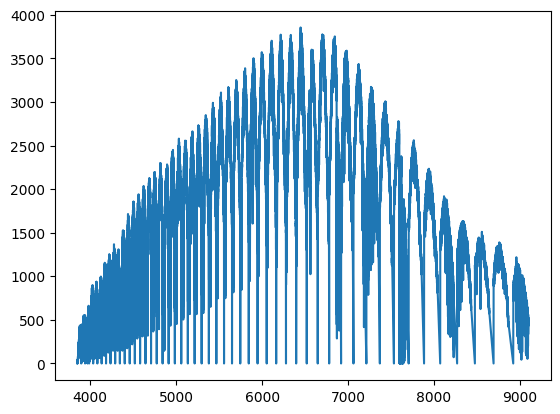

In [26]:
# 13 matrices, 2304*51 rows, 2 columns
alldata = np.zeros((13, 2304*51, 2))

for i in range(0, 12):
    #The line below will need to be changed when I figure out what directory I'm looking at. Some kind of indexing will likely be needed 
    star = readmultispec("/Users/brajo/Downloads/exofop_439602_tagid_job71681/exofop_439602_tagid_job71681/TIC0000047667S-ab20240412.fits", False, False)
    wavelengths = np.zeros(2304*51)
    flux = np.zeros(2304*51)
    for k in range(0, 51):
        for j in range(0, 2304):
            wavelengths[j+2304*k] = star['wavelen'][k][j]
            flux[j+2304*k] = star['flux'][k][j]



    plotted_data = np.column_stack((wavelengths, flux))
    # From copilot
    sorted_plotted_data = plotted_data[plotted_data[:,0].argsort()]
    # End copilot
   
    sorted_plotted_data
    
    alldata[i][:][:] =sorted_plotted_data

for i in range(0, 12):
    plt.plot(alldata[i,:,0], alldata[i,:,1])
    #plt.ylim(0, 500)
    #plt.xlim(a,b)
    plt.show()

C:\Users\brajo\AppData\Local\Temp\ipykernel_7244\2029678139.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  f, ax = plt.subplots()


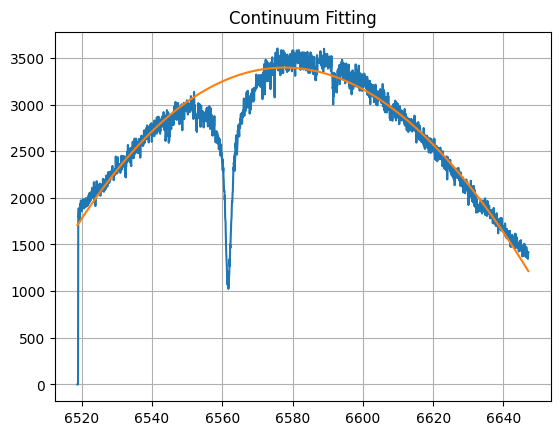

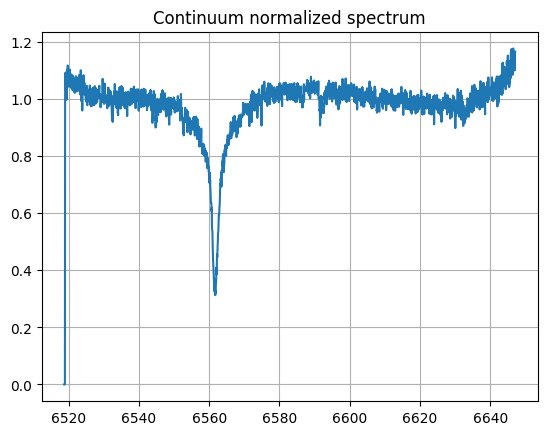

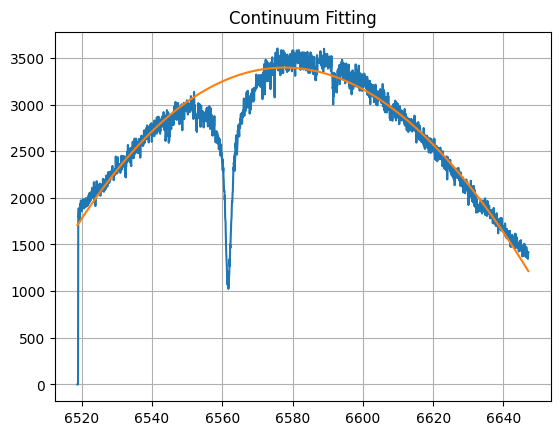

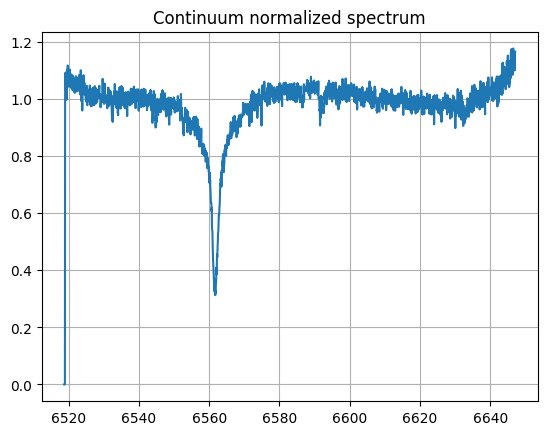

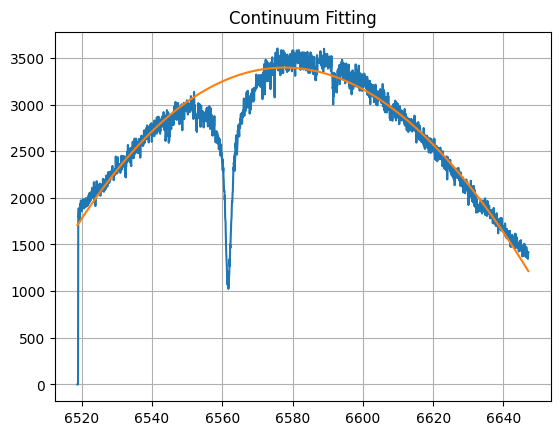

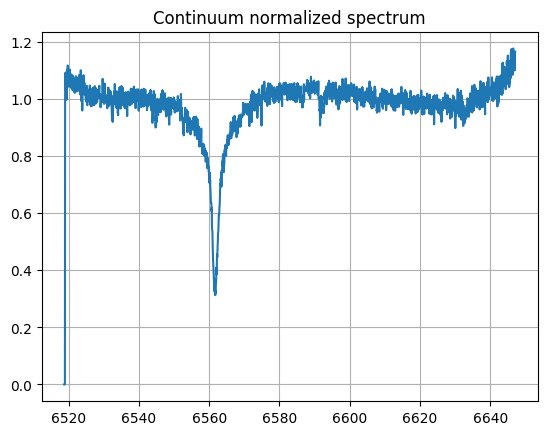

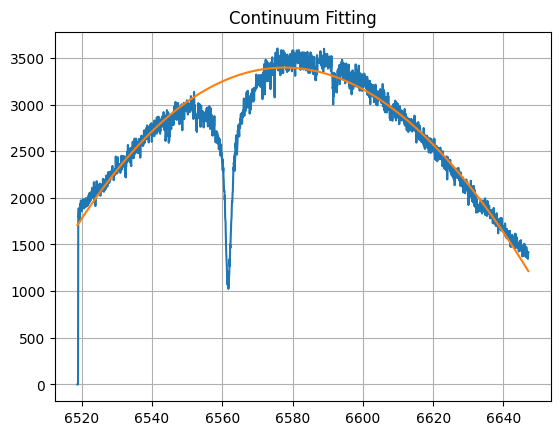

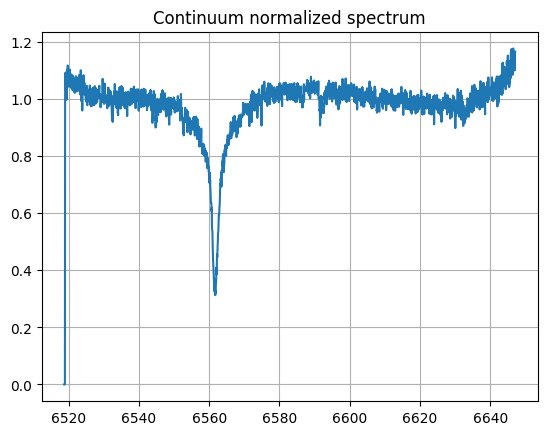

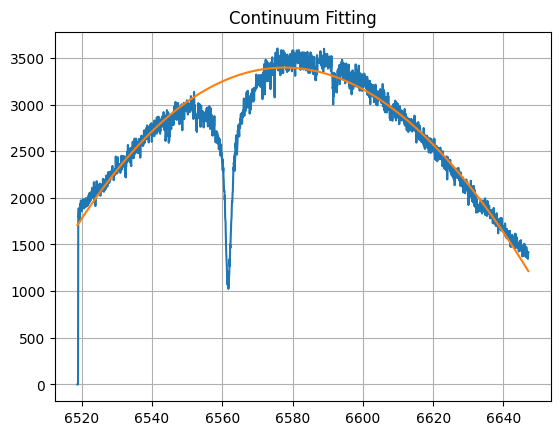

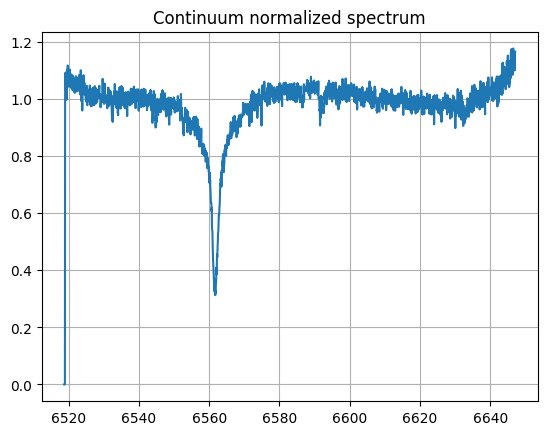

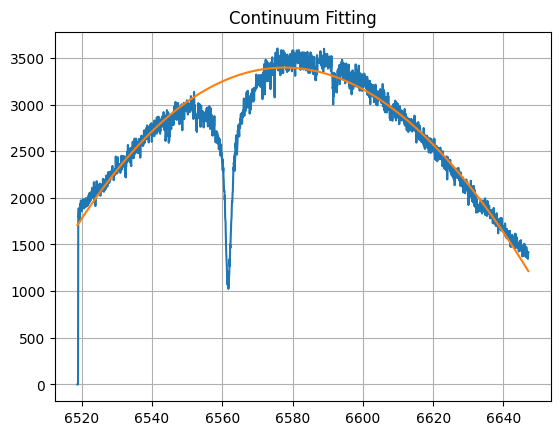

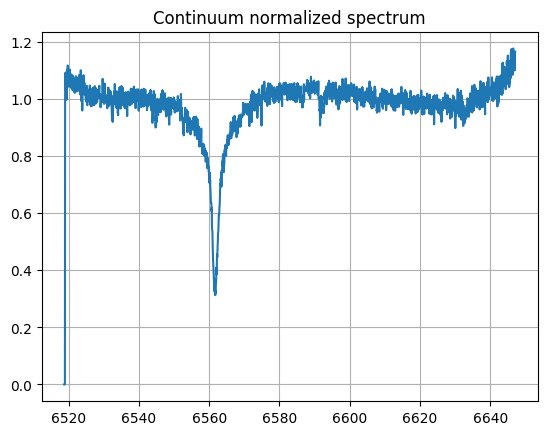

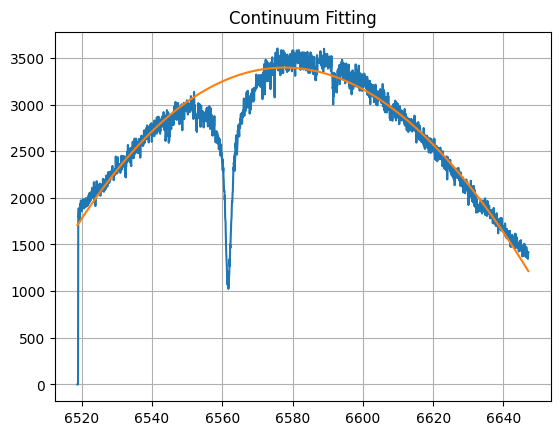

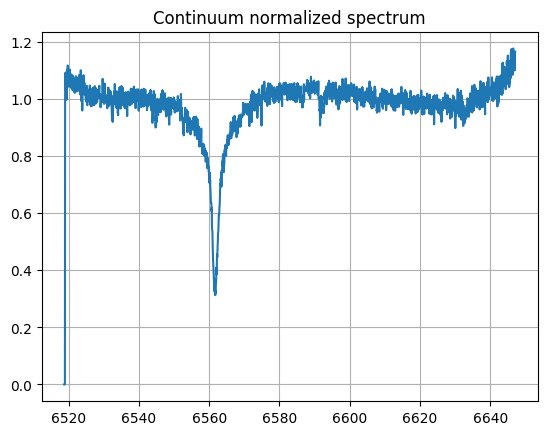

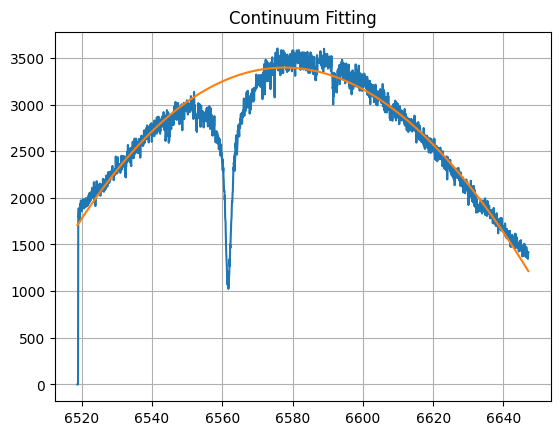

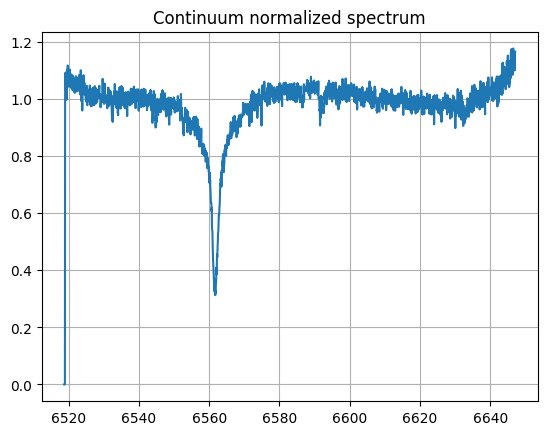

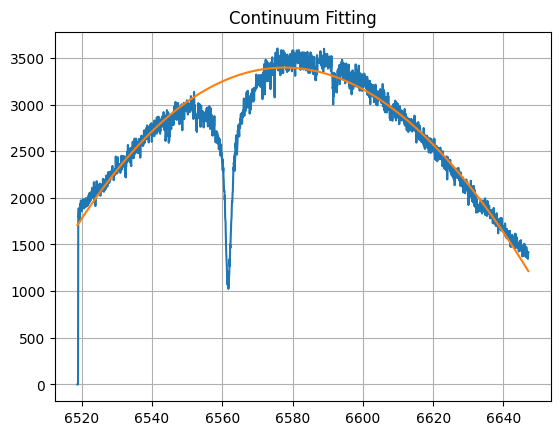

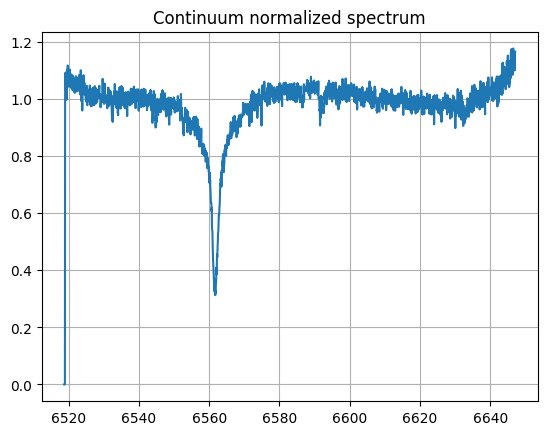

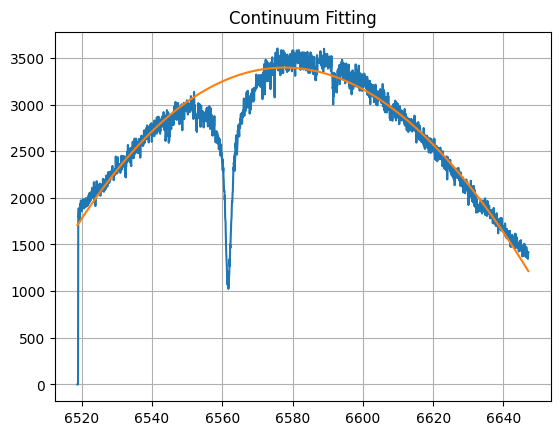

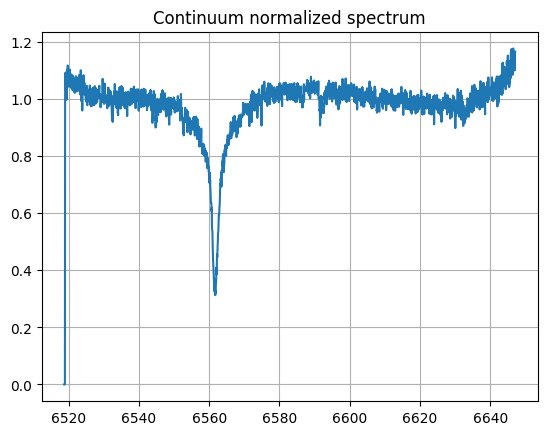

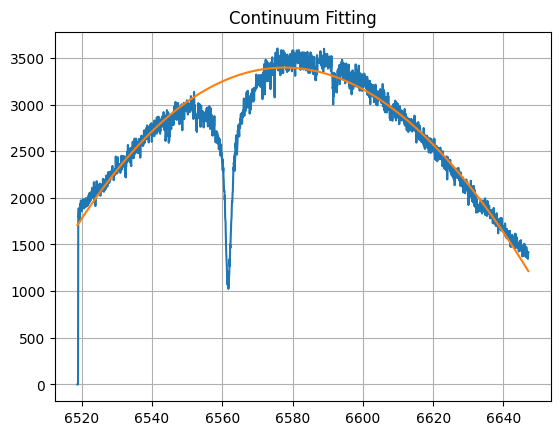

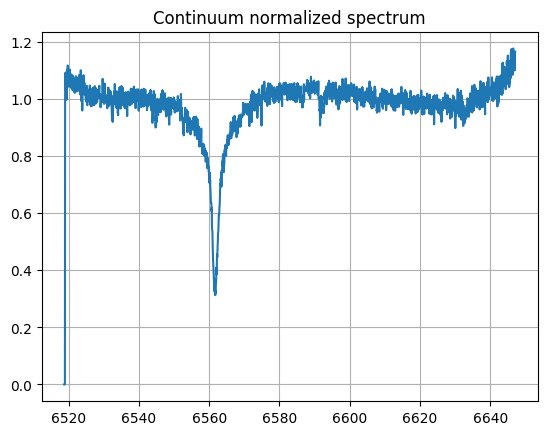

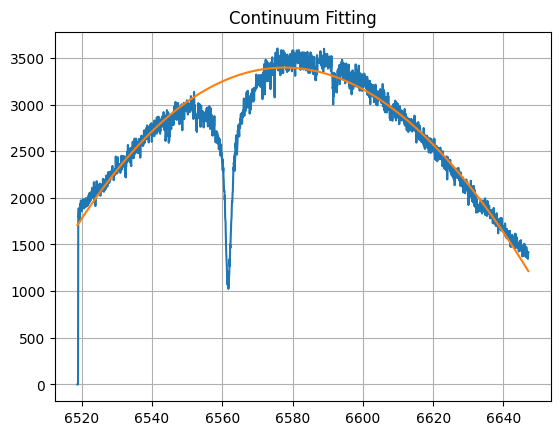

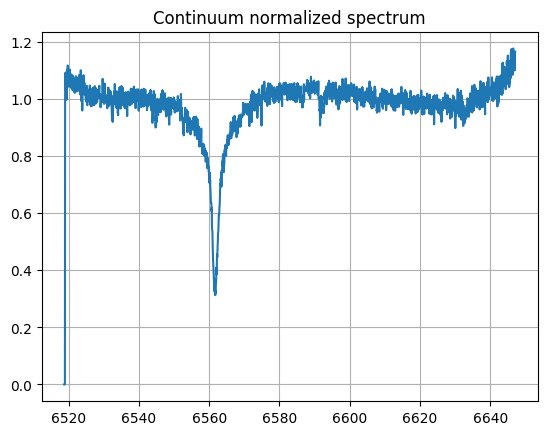

In [25]:
#From Documentation
for i in range(0, 12):
    spectrum = Spectrum(flux=star['flux'][36]*u.Jy, spectral_axis=star['wavelen'][36]*u.um)

    region = [(6518 * u.um, 6550 * u.um), (6590 * u.um, 6645 * u.um)]
    with warnings.catch_warnings():  # Ignore warnings
        warnings.simplefilter('ignore')
        fitted_continuum = fit_continuum(spectrum, window=region)


    y_fit = fitted_continuum(star['wavelen'][36]*u.um)
    f, ax = plt.subplots()
    ax.plot(star['wavelen'][36], star['flux'][36])
    ax.plot(star['wavelen'][36], y_fit)
    ax.set_title("Continuum Fitting")
    plt.grid(True)



    spec_normalized = spectrum[:] / y_fit

    f, ax = plt.subplots()
    ax.plot(spec_normalized.spectral_axis, spec_normalized.flux)
    ax.set_title("Continuum normalized spectrum")
    ax.grid(True)

In [5]:
#Copied from the github of kgullikson88

# readmultispec.py

# Read IRAF (echelle) spectrum in multispec format from a FITS file.
# Can read most multispec formats including linear, log, cubic spline,
# Chebyshev or Legendre dispersion spectra.

# Usage: retdict = readmultispec(fitsfile, reform=True)

# Inputs:

# fitfile     Name of the FITS file
# reform      If true (the default), a single spectrum dimensioned
#             [4,1,NWAVE] is returned as flux[4,NWAVE].  If false,
#             it is returned as a 3-D array flux[4,1,NWAVE].

# Returns a dictionary with these entries:
# flux        Array dimensioned [NCOMPONENTS,NORDERS,NWAVE] with the spectra.
#             If NORDERS=1, array is [NCOMPONENTS,NWAVE]; if NCOMPONENTS is also
#             unity, array is [NWAVE].  (This can be changed
#             using the reform keyword.)  Commonly the first dimension
#             is 4 and indexes the spectrum, an alternate version of
#             the spectrum, the sky, and the error array.  I have also
#             seen examples where NCOMPONENTS=2 (probably spectrum and
#             error).  Generally I think you can rely on the first element
#             flux[0] to be the extracted spectrum.  I don't know of
#             any foolproof way to figure out from the IRAF header what the
#             various components are.
# wavelen     Array dimensioned [NORDERS,NWAVE] with the wavelengths for
#             each order.
# header      The full FITS header from pyfits.
# wavefields  [NORDERS] List with the analytical wavelength
#             description (polynomial coefficients, etc.) extracted from
#             the header.  This is probably not very useful but is
#             included just in case.

# History:
# Created by Rick White based on my IDL readechelle.pro, 2012 August 15
# Apologies for any IDL-isms that remain!
# 
def nonlinearwave(nwave, specstr, verbose=False):
    """Compute non-linear wavelengths from multispec string
    
    Returns wavelength array and dispersion fields.
    Raises a ValueError if it can't understand the dispersion string.
    """

    fields = specstr.split()
    if int(fields[2]) != 2:
        raise ValueError('Not nonlinear dispersion: dtype=' + fields[2])
    if len(fields) < 12:
        raise ValueError('Bad spectrum format (only %d fields)' % len(fields))
    wt = float(fields[9])
    w0 = float(fields[10])
    ftype = int(fields[11])
    if ftype == 3:

        # cubic spline

        if len(fields) < 15:
            raise ValueError('Bad spline format (only %d fields)' % len(fields))
        npieces = int(fields[12])
        pmin = float(fields[13])
        pmax = float(fields[14])
        if verbose:
            print('Dispersion is order-%d cubic spline' % npieces)
        if len(fields) != 15 + npieces + 3:
            raise ValueError('Bad order-%d spline format (%d fields)' % (npieces, len(fields)))
        coeff = np.asarray(fields[15:], dtype=float)
        # normalized x coordinates
        s = (np.arange(nwave, dtype=float) + 1 - pmin) / (pmax - pmin) * npieces
        j = s.astype(int).clip(0, npieces - 1)
        a = (j + 1) - s
        b = s - j
        x0 = a ** 3
        x1 = 1 + 3 * a * (1 + a * b)
        x2 = 1 + 3 * b * (1 + a * b)
        x3 = b ** 3
        wave = coeff[j] * x0 + coeff[j + 1] * x1 + coeff[j + 2] * x2 + coeff[j + 3] * x3

    elif ftype == 1 or ftype == 2:

        # chebyshev or legendre polynomial
        # legendre not tested yet

        if len(fields) < 15:
            raise ValueError('Bad polynomial format (only %d fields)' % len(fields))
        order = int(fields[12])
        pmin = float(fields[13])
        pmax = float(fields[14])
        if verbose:
            if ftype == 1:
                print('Dispersion is order-%d Chebyshev polynomial' % order)
            else:
                print('Dispersion is order-%d Legendre polynomial (NEEDS TEST)' % order)
        if len(fields) != 15 + order:
            # raise ValueError('Bad order-%d polynomial format (%d fields)' % (order, len(fields)))
            if verbose:
                print('Bad order-%d polynomial format (%d fields)' % (order, len(fields)))
                print("Changing order from %i to %i" % (order, len(fields) - 15))
            order = len(fields) - 15
        coeff = np.asarray(fields[15:], dtype=float)
        # normalized x coordinates
        pmiddle = (pmax + pmin) / 2
        prange = pmax - pmin
        x = (np.arange(nwave, dtype=float) + 1 - pmiddle) / (prange / 2)
        p0 = np.ones(nwave, dtype=float)
        p1 = x
        wave = p0 * coeff[0] + p1 * coeff[1]
        for i in range(2, order):
            if ftype == 1:
                # chebyshev
                p2 = 2 * x * p1 - p0
            else:
                # legendre
                p2 = ((2 * i - 1) * x * p1 - (i - 1) * p0) / i
            wave = wave + p2 * coeff[i]
            p0 = p1
            p1 = p2

    else:
        raise ValueError('Cannot handle dispersion function of type %d' % ftype)

    return wave, fields


def readmultispec(fitsfile, reform=True, quiet=False):
    """Read IRAF echelle spectrum in multispec format from a FITS file
    
    Can read most multispec formats including linear, log, cubic spline,
    Chebyshev or Legendre dispersion spectra
    
    If reform is true, a single spectrum dimensioned 4,1,NWAVE is returned
    as 4,NWAVE (this is the default.)  If reform is false, it is returned as
    a 3-D array.
    """

    fh = pyfits.open(fitsfile)
    try:
        header = fh[0].header
        flux = fh[0].data
    finally:
        fh.close()
    temp = flux.shape
    nwave = temp[-1]
    if len(temp) == 1:
        nspec = 1
    else:
        nspec = temp[-2]

    # first try linear dispersion
    try:
        crval1 = header['crval1']
        crpix1 = header['crpix1']
        cd1_1 = header['cd1_1']
        ctype1 = header['ctype1']
        if ctype1.strip() == 'LINEAR':
            wavelen = np.zeros((nspec, nwave), dtype=float)
            ww = (np.arange(nwave, dtype=float) + 1 - crpix1) * cd1_1 + crval1
            for i in range(nspec):
                wavelen[i, :] = ww
            # handle log spacing too
            dcflag = header.get('dc-flag', 0)
            if dcflag == 1:
                wavelen = 10.0 ** wavelen
                if not quiet:
                    print('Dispersion is linear in log wavelength')
            elif dcflag == 0:
                if not quiet:
                    print('Dispersion is linear')
            else:
                raise ValueError('Dispersion not linear or log (DC-FLAG=%s)' % dcflag)

            if nspec == 1 and reform:
                # get rid of unity dimensions
                flux = np.squeeze(flux)
                wavelen.shape = (nwave,)
            return {'flux': flux, 'wavelen': wavelen, 'header': header, 'wavefields': None}
    except KeyError:
        pass

    # get wavelength parameters from multispec keywords
    try:
        wat2 = header['wat2_*']
        count = len(wat2)
    except KeyError:
        raise ValueError('Cannot decipher header, need either WAT2_ or CRVAL keywords')

    # concatenate them all together into one big string
    watstr = []
    for i in range(len(wat2)):
        # hack to fix the fact that older pyfits versions (< 3.1)
        # strip trailing blanks from string values in an apparently
        # irrecoverable way
        # v = wat2[i].value
        v = wat2[i]
        v = v + (" " * (68 - len(v)))  # restore trailing blanks
        watstr.append(v)
    watstr = ''.join(watstr)

    # find all the spec#="..." strings
    specstr = [''] * nspec
    for i in range(nspec):
        sname = 'spec' + str(i + 1)
        p1 = watstr.find(sname)
        p2 = watstr.find('"', p1)
        p3 = watstr.find('"', p2 + 1)
        if p1 < 0 or p1 < 0 or p3 < 0:
            raise ValueError('Cannot find ' + sname + ' in WAT2_* keyword')
        specstr[i] = watstr[p2 + 1:p3]

    wparms = np.zeros((nspec, 9), dtype=float)
    w1 = np.zeros(9, dtype=float)
    for i in range(nspec):
        w1 = np.asarray(specstr[i].split(), dtype=float)
        wparms[i, :] = w1[:9]
        if w1[2] == -1:
            raise ValueError('Spectrum %d has no wavelength calibration (type=%d)' %
                             (i + 1, w1[2]))
            # elif w1[6] != 0:
            #    raise ValueError('Spectrum %d has non-zero redshift (z=%f)' % (i+1,w1[6]))

    wavelen = np.zeros((nspec, nwave), dtype=float)
    wavefields = [None] * nspec
    for i in range(nspec):
        # if i in skipped_orders:
        #    continue
        verbose = (not quiet) and (i == 0)
        if wparms[i, 2] == 0 or wparms[i, 2] == 1:
            # simple linear or log spacing
            wavelen[i, :] = np.arange(nwave, dtype=float) * wparms[i, 4] + wparms[i, 3]
            if wparms[i, 2] == 1:
                wavelen[i, :] = 10.0 ** wavelen[i, :]
                if verbose:
                    print('Dispersion is linear in log wavelength')
            elif verbose:
                print('Dispersion is linear')
        else:
            # non-linear wavelengths
            wavelen[i, :], wavefields[i] = nonlinearwave(nwave, specstr[i],
                                                         verbose=verbose)
        wavelen *= 1.0 + wparms[i, 6]
        if verbose:
            print("Correcting for redshift: z=%f" % wparms[i, 6])
    if nspec == 1 and reform:
        # get rid of unity dimensions
        flux = np.squeeze(flux)
        wavelen.shape = (nwave,)
    return {'flux': flux, 'wavelen': wavelen, 'header': header, 'wavefields': wavefields}